In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

## 1. Error function

1. 에러함수를 수치적분을 이용하여 구하고 그래프를 그려라. (어떤 방법을 이용하든 관계없음)

Text(0, 0.5, '$erf(x)$')

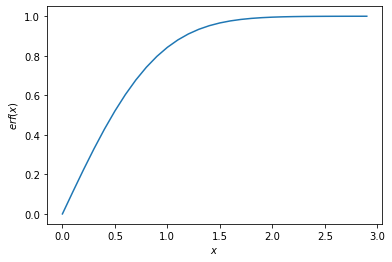

In [123]:
from scipy import special

plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')

2. 에러함수의 테일러 전개식과 적분결과를 그래프로 그리고 비교하여라.

In [124]:
def erf2(x):
    f,n = 0,0
    
    while n<150:
        a = (-1)**n
        b = x**(2*n+1)
        c = 2*n+1
        d = math.factorial(n)
        e = 2/(np.pi**(0.5))
        n = n+1
        f = f + ((a*b)/(c*d))*e
    return f

Text(0, 0.5, '$erf2(x)$')

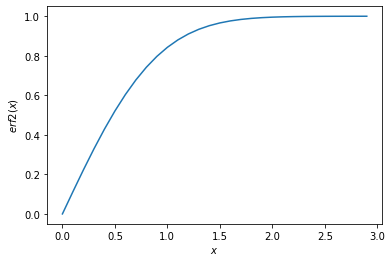

In [125]:
plt.plot(x,erf2(x))
plt.xlabel('$x$')
plt.ylabel('$erf2(x)$')

Text(0, 0.5, '$erf2(x)$')

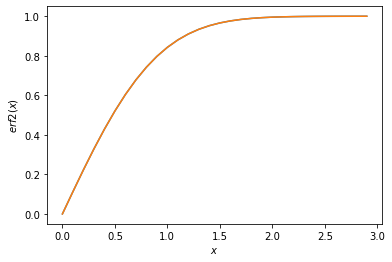

In [139]:
plt.plot(x, special.erf(x))
plt.plot(x,erf2(x))
plt.xlabel('$x$')
plt.ylabel('$erf2(x)$')

에러함수의 수치적분값과 테일러 전개식은 같은 그래프를 보인다.

## 2. (Integration) Trigonometric Function

1. sin, cos함수를 trapezoidal 방법을 이용하여 직접 적분하고 그래프를 그려라.

In [127]:
def func_sin(x):
    return np.sin(x)
def func_cos(x):
    return np.cos(x)

def trapez(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

Text(0.5, 0, 'Integration of cos')

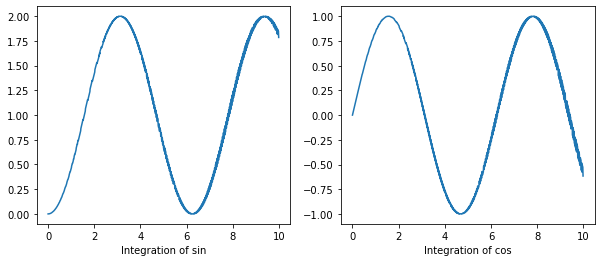

In [128]:
plt.figure(figsize=(10,4))

xdata=np.arange(0,10,0.01)

plt.subplot(121)
plt.plot(xdata,[trapez(func_sin,0,b,100) for b in xdata])
plt.xlabel('Integration of sin')
plt.subplot(122)
plt.plot(xdata,[trapez(func_cos,0,b,100) for b in xdata])
plt.xlabel('Integration of cos')

2. sin, cos함수를 scipy.integrate 함수를 이용하여 적분하고 그래프를 그려라.

In [129]:
from scipy import integrate

def func_sin(x):
    return np.sin(x)
def func_cos(x):
    return np.cos(x)

integrate.quad(func_sin,0,1), integrate.quad(func_cos,0,1)

((0.45969769413186023, 5.103669643922839e-15),
 (0.8414709848078965, 9.34220461887732e-15))

Text(0.5, 0, 'Integration of cos')

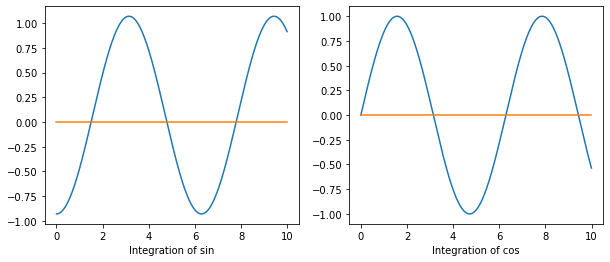

In [130]:
plt.figure(figsize=(10,4))

xdata=np.arange(0,10,0.01)

plt.subplot(121)
plt.plot(xdata,[integrate.quad(func_sin,-1.5,i) for i in xdata])
plt.xlabel('Integration of sin')
plt.subplot(122)
plt.plot(xdata,[integrate.quad(func_cos,0,i) for i in xdata])
plt.xlabel('Integration of cos')

## 3. (Differentiation) Trigonometric Function¶

1. sin, cos함수의 도함수를 finite difference 방법을 이용하여 구현하고 그래프를 그려라.

In [131]:
xdata = np.arange(0,10,0.01)

def func_sin(x):
    return np.sin(x)
def func_cos(x):
    return np.cos(x)

def trapez(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

def for_diff(f,x,dx):
    return (f(x+dx)-f(x))/dx
def back_diff(f,x,dx):
    return (f(x)-f(x-dx))/dx
def cen_diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

In [132]:
dx=0.1
xdata=np.arange(0,10,0.01)
diff1=[for_diff(func_sin,i,dx) for i in xdata]
diff2=[back_diff(func_sin,i,dx) for i in xdata]
diff3=[cen_diff(func_sin,i,dx) for i in xdata]

diff4=[for_diff(func_cos,i,dx) for i in xdata]
diff5=[back_diff(func_cos,i,dx) for i in xdata]
diff6=[cen_diff(func_cos,i,dx) for i in xdata]

Text(0.5, 0, 'derivative of cos')

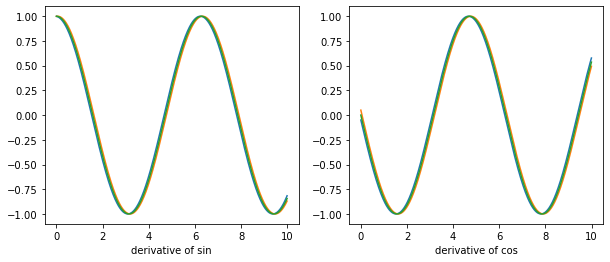

In [133]:
plt.figure(figsize=(10,4))

xdata=np.arange(0,10,0.01)

plt.subplot(121)
plt.plot(xdata,diff1)
plt.plot(xdata,diff2)
plt.plot(xdata,diff3)
plt.xlabel('derivative of sin')

plt.subplot(122)
plt.plot(xdata,diff4)
plt.plot(xdata,diff5)
plt.plot(xdata,diff6)
plt.xlabel('derivative of cos')

2. sin, cos함수의 도함수를 scipy.misc.derivative 함수를 이용하여 구하고 그래프를 그려라.

In [134]:
from scipy.misc import derivative

def func_sin(x):
    return np.sin(x)
def func_cos(x):
    return np.cos(x)

derivative(func_sin, (np.pi)*2, dx=0.01), derivative(func_cos, (np.pi)*2, dx=0.01)

(0.9999833334166451, 0.0)

Text(0.5, 0, 'derivative of cos')

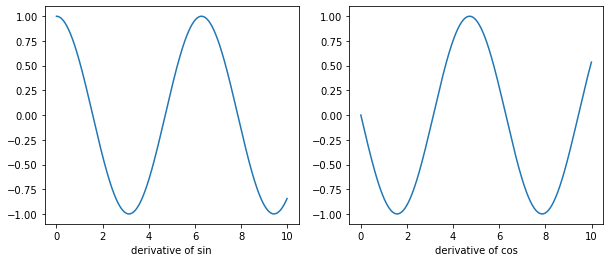

In [135]:
plt.figure(figsize=(10,4))

xdata=np.arange(0,10,0.01)

plt.subplot(121)
plt.plot(xdata,[derivative(func_sin,i,dx=0.1) for i in xdata])
plt.xlabel('derivative of sin')
plt.subplot(122)
plt.plot(xdata,[derivative(func_cos,i,dx=0.1) for i in xdata])
plt.xlabel('derivative of cos')